In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
color = sns.color_palette()
import plotly
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()

import os
from configparser import ConfigParser
import requests
from datetime import datetime

import os
print(os.listdir("archive"))

['BAC.csv', 'C.csv', 'GS.csv', 'JPM.csv', 'MS.csv', 'WFC.csv']


In [2]:
# Dataframe having list of stocks with their ticker symbols
stocklist = pd.DataFrame([['Bank of America', 'BAC'], ['CitiGroup','C'], ['Goldman Sachs', 'GS'], ['JPMorgan Chase', 'JPM'],
                                  ['Morgan Stanley','MS'], ['Wells Fargo','WFC']], columns= ['stock','symbol'])
stocklist

,stock,symbol
0,Bank of America,BAC
1,CitiGroup,C
2,Goldman Sachs,GS
3,JPMorgan Chase,JPM
4,Morgan Stanley,MS
5,Wells Fargo,WFC


In [3]:
# Reading the stock price CSV files
for i,val in stocklist.iterrows():
    #print(val['symbol'])
    path = 'archive/' +  val['symbol'] + '.csv'
    vars()[val['symbol']] = pd.read_csv(path).rename(columns= {'Unnamed: 0':'date'}).set_index('date')

In [4]:
# Concatenating the files together in a single dataframe
tickers = stocklist['symbol'].tolist()
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Stock','Info']
bank_stocks.head()

Stock         BAC                                     C                       \
Info         open   high    low  close    volume   open   high    low  close   
date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04  47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05  46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06  46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09  46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Stock                 ...     MS                                    WFC  \
Info          volume  ...   open   high      low  close   volume   open   
date                  ...                                                 
2006-01-03  15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04  18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05  11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06  13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09  16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Stock                                     
Info         high    low  close   volume  
date                                      
2006-01-03  63.95  62.39  63.80  5508200  
2006-01-04  63.64  62.73  63.06  5435000  
2006-01-05  63.11  62.62  62.99  5079000  
2006-01-06  63.55  62.77  63.36  4201900  
2006-01-09  63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

In [5]:
# Making a plotly plot of the Close Price vs Time for the years 2007-2011 showing the financial crisis in 2008.
layout = go.Layout(
    title=go.layout.Title(
        text='Close Price (2007-2011) vs Time',
    ))
bank_stocks.xs(key='close',axis=1,level='Info').loc['2007-01-01':'2012-01-01'].iplot(layout=layout)

<font color=navy size=3> **Price downtrends can be clearly seen in 2008** </font>**

#### Reference roadmap to guide data analysis-
- Unknown results/values
- Surprising comparisons
- Significant extremes or outliers
- Abnormal distributions

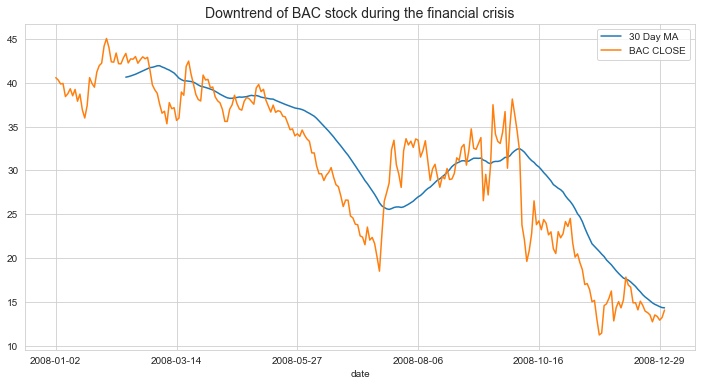

In [6]:
# Close Price and Smoothed Close Price of BAC during the financial crisis
plt.figure(figsize=(12,6))
plt.title('Downtrend of BAC stock during the financial crisis', size=14)
BAC['close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day MA')
BAC['close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.show()

In [7]:
# Finding max and min Close price of each stock and plotting it
maxs = bank_stocks.xs(key='close',axis=1,level='Info').max().reset_index()
maxs.columns= ['stock', 'max']
mins = bank_stocks.xs(key='close',axis=1,level='Info').min().reset_index()
mins.columns= ['stock', 'min']

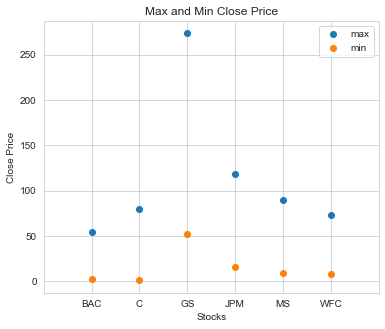

In [8]:
m = maxs.merge(mins, on='stock').set_index('stock')
m.plot(kind='line', figsize=(6,5), style='o')
plt.xlabel('Stocks')
plt.ylabel('Close Price')
plt.title('Max and Min Close Price')
# Loc, Value to xticks
plt.xticks(range(m.shape[0]), m.index)
plt.xlim([-1, len(m)])
plt.show()

In [9]:
print(m)

          max    min
stock               
BAC     54.90   3.14
C       80.08   1.02
GS     273.38  52.00
JPM    118.77  15.90
MS      89.30   9.20
WFC     73.00   8.12


<font color=navy size=3>**All stock prices except GS fell really low.
    <br>GS max price is quite higher than other stocks** </font>

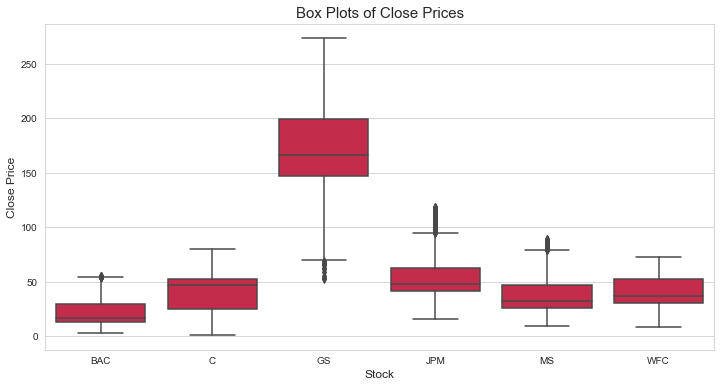

In [10]:
# Boxplots to see a comparison of the ranges and quartiles of stock prices
b =bank_stocks.xs(key='close',axis=1,level='Info')
c = b.unstack().reset_index()
c = c.rename(columns={0:'val'})
plt.figure(figsize=(12,6))
sns.boxplot(x='Stock', y="val", data=c, color='crimson')
plt.ylabel('Close Price', fontsize=12)
plt.xlabel('Stock', fontsize=12)
plt.title("Box Plots of Close Prices", fontsize=15)
plt.show()

<font color=navy size=3>**Its interesting to see that some stocks (BAC, JPM, MS) have outliers on upper extremes while GS has outliers on the lower extreme.**</font>

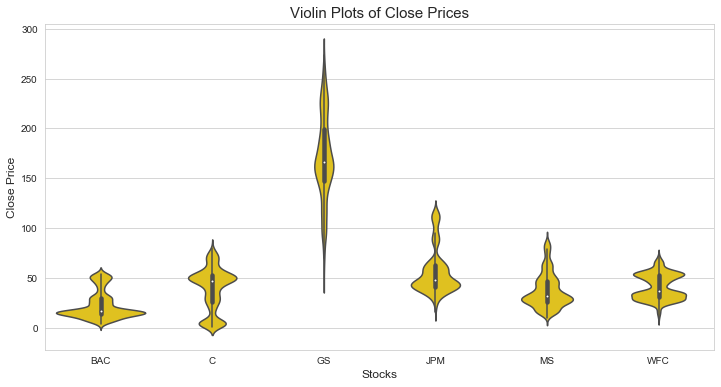

In [11]:
# Violinplots to get idea of the distribution of stock prices
plt.figure(figsize=(12,6))
sns.violinplot(x='Stock', y="val", data=c, color='gold', alpha=0.9)
plt.ylabel('Close Price', fontsize=12)
plt.xlabel('Stocks', fontsize=12)
plt.title("Violin Plots of Close Prices", fontsize=15)
plt.show()

<font color=navy size=3>**Interseting to observe the multinodal distribution of the prices, which was not indicated by the boxplots.** </font>

In [12]:
# Finding the daily returns of each stock from the close prices
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
    returns = returns.dropna(axis=0)
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


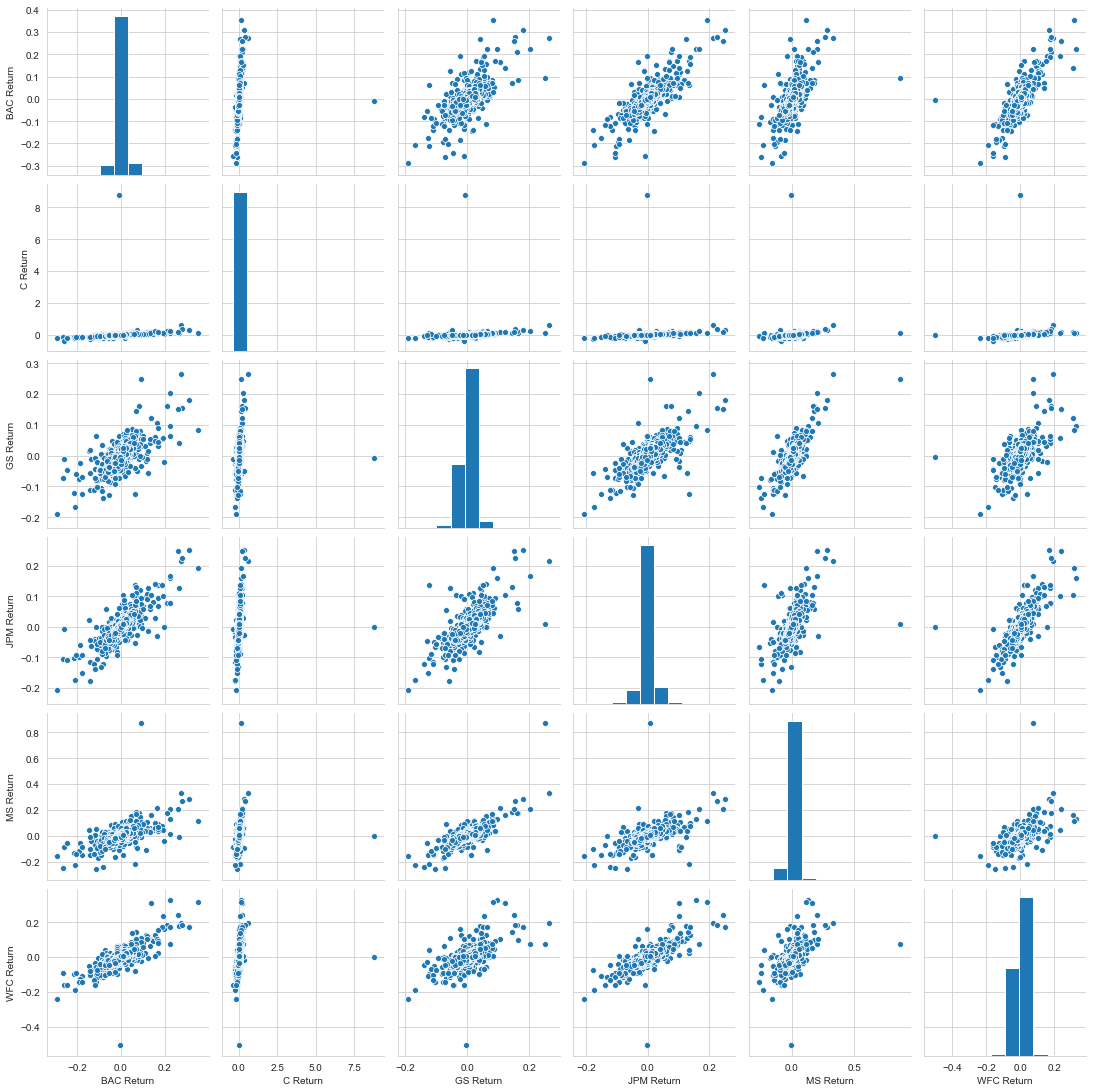

In [13]:
# Pair-wise scatter plot of returns of each stock
sns.pairplot(returns)
plt.show()

<font color=navy size=3>**Citibank (C) seems to have a strange relation with other stocks, with its returns always being close to zero.
<br>A google search determied that Citibank stock had a crash in Nov, 2008
<br>Also, there's an extreme outlier in Citibank returns.** </font>

In [14]:
# Candlestick chart of Citibank stock in Nov 2008.
C[['open', 'high', 'low', 'close']].loc['2008-10-01':'2009-01-01'].iplot(kind='candle')

<font color=navy size=3>**Note the series of Red candles (Close Price < Open Price) along with the downward trend in Nov 2008, indicating the crash of Citibank stock.**</font>

In [15]:
# Worst Drop in returns

ret_idx_min = returns.idxmin().reset_index()
ret_idx_min.columns = ['stock', 'date']
ret_min = returns.min().reset_index()
ret_min.columns = ['stock', 'min_return']
ret_min['min_return'] = ret_min['min_return'].apply(lambda x: '%.2f'%x)
ret_idx_min.merge(ret_min, on='stock').set_index('stock')

,date,min_return
stock,,
BAC Return,2009-01-20,-0.29
C Return,2009-02-27,-0.39
GS Return,2009-01-20,-0.19
JPM Return,2009-01-20,-0.21
MS Return,2008-10-09,-0.26
WFC Return,2006-08-14,-0.50


<font color=navy size=3>**3 of these were on 2009-01-20, which was when Barack Obama became the President of US!**</font>

In [16]:
# Best single day gains

ret_idx_max = returns.idxmax().reset_index()
ret_idx_max.columns = ['stock', 'date']
ret_max = returns.max().reset_index()
ret_max.columns = ['stock', 'max_return']
ret_max['max_return'] = ret_max['max_return'].apply(lambda x: '%.2f'%x)
ret_idx_max.merge(ret_max, on='stock').set_index('stock')

,date,max_return
stock,,
BAC Return,2009-04-09,0.35
C Return,2011-05-09,8.77
GS Return,2008-11-24,0.26
JPM Return,2009-01-21,0.25
MS Return,2008-10-13,0.87
WFC Return,2008-07-16,0.33


In [17]:
# Some idea of sudden Recuperation-- Difference between max and min gain days
pd.to_datetime(returns.idxmax()) - pd.to_datetime(returns.idxmin())

BAC Return    79 days
C Return     801 days
GS Return    -57 days
JPM Return     1 days
MS Return      4 days
WFC Return   702 days
dtype: timedelta64[ns]

<font color=navy size=3>**Long recuperation time for Citigroup as it entirely crashed.
<br>JPM- the next day itself!
<br>GS had the day of max returns 2 months earlier than the day of worst returns.**</font>

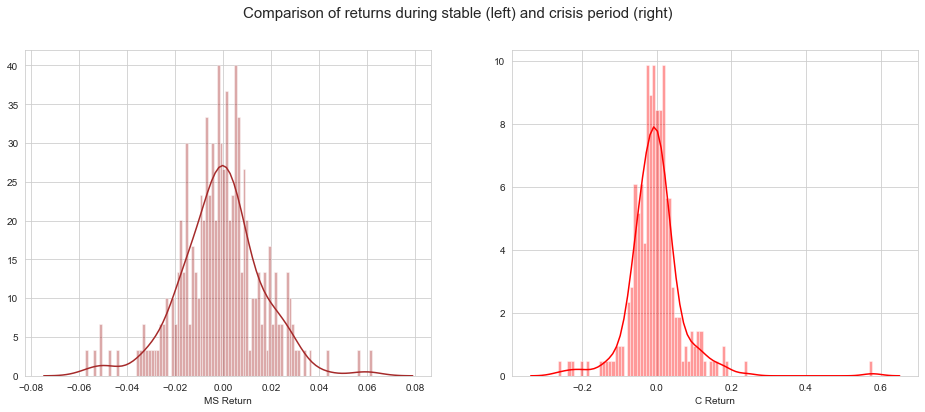

In [18]:
# Distribution plots of stock returns during crisis and stable periods
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
plt.suptitle('Comparison of returns during stable (left) and crisis period (right)', size=15)
sns.distplot(returns.loc['2018-01-01':'2018-12-31']['MS Return'],color='brown',bins=100, ax= ax[0])
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100, ax=ax[1])
plt.show()

<font color=navy size=3>**In the stable period, returns ranged from about -0.06 to 0.08 while in the period of financial crisis the range increases to -0.2 to 0.6, an increase by a magnitude of 10!**</font>

In [19]:
# Standard Deviation of returns as a measure of riskness of the stocks
returns.std().map(lambda x :'%.2f'%x)

BAC Return    0.03
C Return      0.16
GS Return     0.02
JPM Return    0.03
MS Return     0.03
WFC Return    0.03
dtype: object

<font color=navy size=3>**Citigroup has been the riskiest stock as indicated by the high value of standard deviation.**</font>

In [20]:
# Bollinger Bands (for risk assessement) of Citibank stock
C['close'].loc['2007-01-01':'2009-12-31'].ta_plot(study='boll')

<font color=navy size=3>**Note the wide Bollinger bands indicating high volatility in the crisis period before the stock value became almost nill.**</font>

In [21]:
# Standard Deviation during Jan 2018- Dec 2018
returns.loc['2018-01-01':'2018-12-31'].std().map(lambda x :'%.3f'%x)

BAC Return    0.016
C Return      0.015
GS Return     0.016
JPM Return    0.014
MS Return     0.017
WFC Return    0.015
dtype: object

<font color=navy size=3>**Very similar risk profiles of the stocks in stable period.**</font>

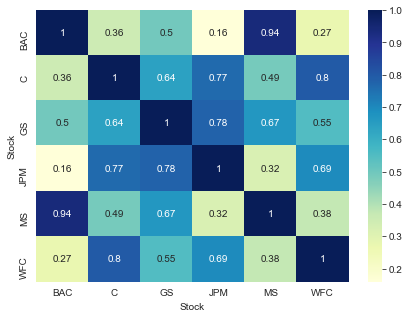

In [22]:
# Heatmap of correlation between stock prices
plt.figure(figsize=(7,5))
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Info').corr(),annot=True, cmap='YlGnBu')
plt.show()

<font color=navy size=3>**(BAC,MS) and (WFC, C) prices quite correlated.**</font>

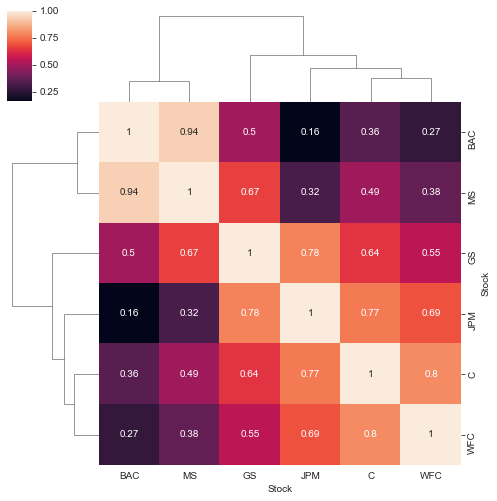

In [23]:
# Dendogram of correlation between stock prices
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Info').corr(),annot=True, figsize=(7,7))

<font color=navy size=3>**The Dendrogram above shows hierarchichal clustering where stocks with high correlation are grouped together.**</font>

<font color=navy size=5>**Conclusions** </font>
* Stock prices during the financial crisis of 2008 were analyzed.
* There was a dip in the prices of all the stocks.
* GS stock was relatively stable, with its maximum price quite higher than the other stocks.
* When boxplots were plotted for the stock prices, there were some stocks with outliers at lower extremes, while some with outliers at upper extremes.
* Violinplots revealed the multinodal distribution of the prices, which were not indicated by the boxplots.
* Citibank stock had a crash in November 2008, indicated by the Scatter plot of its returns against other stocks' returns.
* The day of worst drop in returns was Jan 20, 2009 for three of our stocks. This was when Barack Obama became the new President of USA!
* Citibank stock took a long time to recuperate compared to other stocks.
* Variance of returns during the crisis were about an order of magnitude greater than the variance of returns in the stable period.
* Citigroup was the riskiest stock as indicated by the high standard deviation of its returns.
* Wide Bollingers bands for Citibank revealed the stock volatility.
* The stocks had a very similar risk profile in the stable period.
* (BAC, MS) and (WFC, C) stocks were quite correlated. Dendrogram groupings gave further insight into this.
